<a href="https://colab.research.google.com/github/SwapnasumaM/Megaminds/blob/main/MegamindsTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


Generating the synthetic data

In [3]:
def generate_data(num_samples):
    # True channel parameters
    true_gain = 2.0  # Gain of the channel
    noise_variance = 0.5  # Variance of the noise

    # Transmitted signals (random values)
    X = np.random.randn(num_samples)

    # Channel effect and noise
    Y = true_gain * X + np.random.normal(scale=np.sqrt(noise_variance), size=num_samples)

    return X, Y

# Generating training data
X_train, Y_train = generate_data(10000)
X_test, Y_test = generate_data(2000)


Building a neural network model

In [4]:
def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(1,)),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

model = build_model()


Training the model

In [5]:
model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
313/313 [==============================] - 2s 2ms/step - loss: 0.5613
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 0.5269
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 0.5171
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 0.5191
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 0.5140
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 0.5149
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 0.5202
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 0.5094
Epoch 9/50
313/313 [==============================] - 1s 3ms/step - loss: 0.5161
Epoch 10/50
313/313 [==============================] - 1s 3ms/step - loss: 0.5201
Epoch 11/50
313/313 [==============================] - 1s 3ms/step - loss: 0.5085
Epoch 12/50
313/313 [==============================] - 1s 2ms/step - loss: 0.5093
Epoch 13/50
313/313 [====

Evaluating the model

63/63 [==============================] - 0s 2ms/step


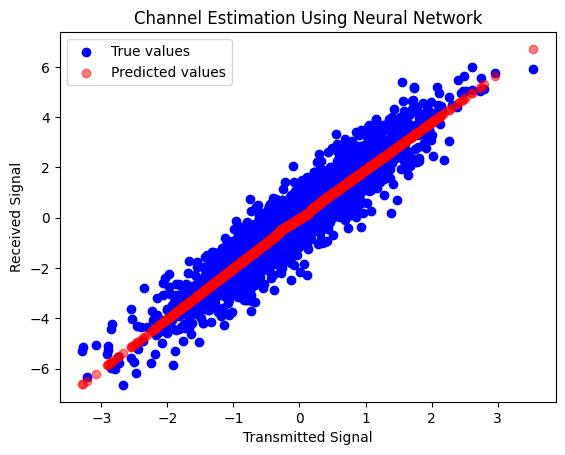

In [6]:
Y_pred = model.predict(X_test).flatten()
plt.scatter(X_test, Y_test, color='blue', label='True values')
plt.scatter(X_test, Y_pred, color='red', alpha=0.5, label='Predicted values')
plt.title("Channel Estimation Using Neural Network")
plt.xlabel("Transmitted Signal")
plt.ylabel("Received Signal")
plt.legend()
plt.show()
